In [9]:
#COGN stock analysis
conga = pd.read_csv('conga.csv')
conga['MA10'] = conga['Close'].rolling(10).mean()
conga['MA60'] = conga['Close'].rolling(60).mean()
conga = conga.dropna()
conga.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA60
1179,2020-02-17,11.79,11.99,11.51,11.71,11.71,14257700.0,11.668,11.449500
1180,2020-02-18,11.60,11.65,11.19,11.40,11.40,18790200.0,11.578,11.468500
1181,2020-02-19,11.33,11.44,11.11,11.15,11.15,21297000.0,11.475,11.478667
1182,2020-02-20,11.17,11.42,11.00,11.05,11.05,16678700.0,11.395,11.488667
1183,2020-02-21,11.00,11.08,10.96,11.05,11.05,12535000.0,11.371,11.500167


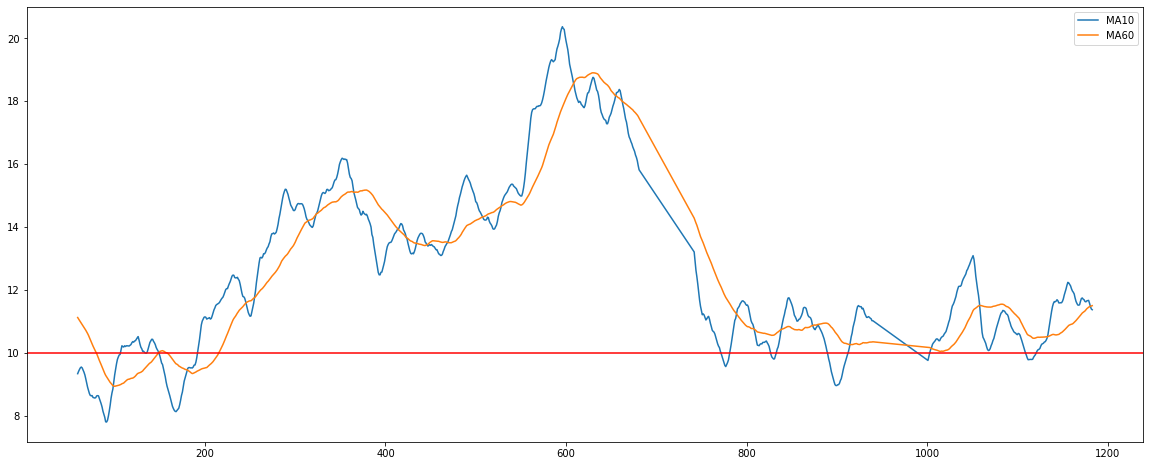

In [15]:
#when MA10 beats MA60 means it´s time to buy and hold the stock, as we can see, this is unclear right now
conga['MA10'].plot(figsize=(20,8))
conga['MA60'].plot(figsize=(20,8))
plt.axhline(10, color='red')
plt.legend()
plt.show()

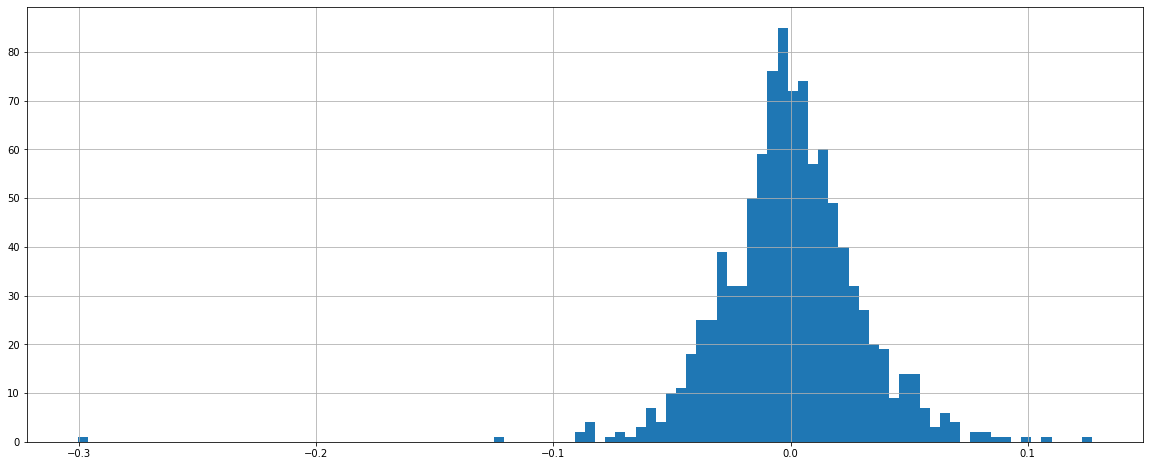

In [19]:
#returns gauss distribution
import numpy as np
conga['LogReturns'] = np.log(conga['Close']).shift(-1)-np.log(conga['Close'])
conga['LogReturns'].hist(bins=100,figsize=(20,8))

In [24]:
#chances of losing 1% in a day is
from scipy.stats import norm
mu = conga['LogReturns'].mean()
sigma = conga['LogReturns'].std(ddof=1)
prob1= norm.cdf(-0.01,mu,sigma)
print('Chances of dropping 1% a day is',prob1)

Chances of dropping 1% a day is 0.3647381843358313


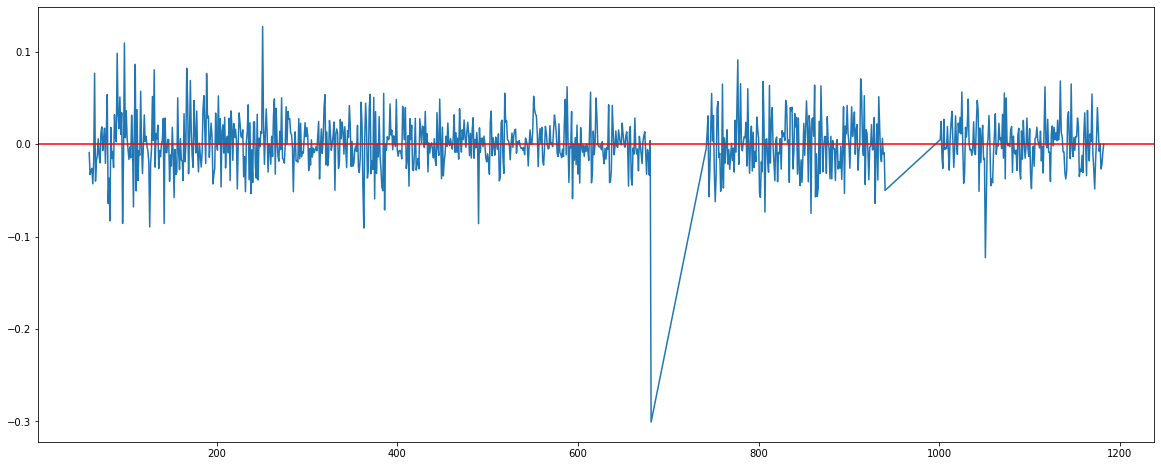

In [29]:
conga['LogReturns'].plot(figsize=(20,8))
plt.axhline(0, color='red')
plt.show()

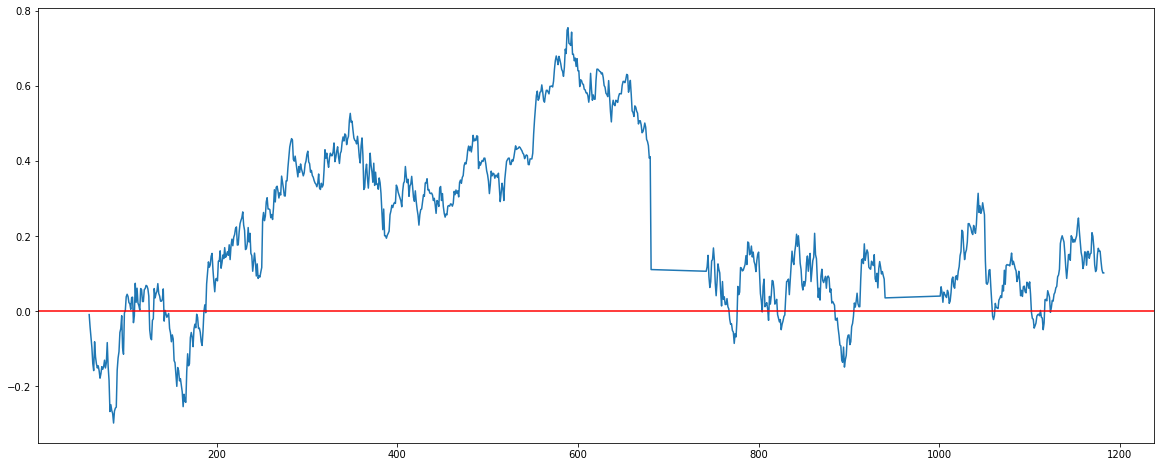

In [33]:
#wealth created for the shareholder during this time series
conga['Wealth'] = conga['LogReturns'].cumsum()
conga['Wealth'].plot(figsize=(20,8))
plt.axhline(0,color='red')
plt.show()

In [34]:
#confidence interval calculation
sample_size = conga['LogReturns'].shape[0]
sample_mean = conga['LogReturns'].mean()
sample_std = conga['LogReturns'].std(ddof=1) / sample_size**0.5
z_left = norm.ppf(0.1)
z_right = norm.ppf(1.0)
interval_left = sample_mean + z_left*sample_std
interval_right = sample_mean + z_right*sample_std
print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (-0.0010793781260431939, inf)


In [40]:
#probability of losing 5% in 220 days sharing this equity
mu220 = mu*220
sigma220 = (220**0.5) * sigma
print('prob of losing 5% a year is', norm.cdf(-0.05,mu220,sigma220))

prob of losing 5% a year is 0.433717855108712
